### 출처:  AIFFEL _ 딥러닝 한번에 끝내기_RS7

# 모델 구조

케라스에서 제공하는 API는 크게 2가지로 나누어지며, 필요한 모듈들은 Modues API를 호출하여 사용 가능하다. 
* Model API
* Layer API
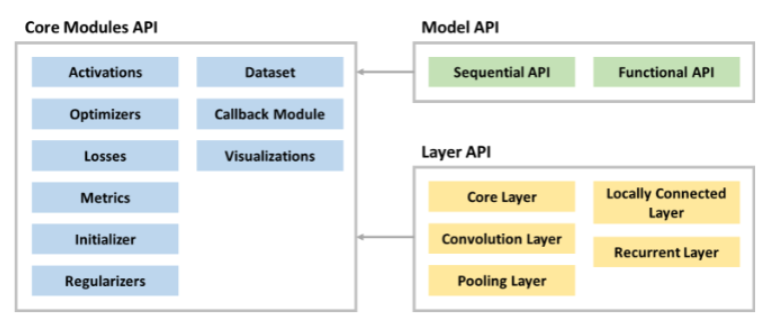

### Layer

기본적으로 input layer, hidden layer, output layer로 구분한다.
* Input layer
    - 딥러닝 모델의 입력을 정의할 때 사용한다.
    - 입력 데이터의 모양인 shape과 데이터 유형 dtype등을 포함한다.
* Dense layer
    - fully-connected layer로 노드 수(유닛수)를 지정하여 생성한다.
* Flatten layer
    - 배치 크기를 제외하고 데이터를 1차원 형태로 변환한다.
* Activation layer
    - 활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할 수행한다.
    - 크게 두 가지로 구분된다.
        - Linear activation function
        - Non-linear activation function
    - 딥러닝에서는 모델 표현력을 위해서 비선형 활성화 함수를 사용한다.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Input layer**

입력 데이터의 shape, dtype, batch_size, name 등을 지정할 수 있다

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_2')>

**Dense layer** 

유닛수, activation function, name 을 지정할 수 있다

In [4]:
layers.Dense(10, activation='relu', name='Dense Layer')

In [7]:
# 랜덤으로 값을 만들고, 생성한 레이어에 그 값을 입력으로 사용한 뒤에 레이어 가중치 값과 결과 값을 확인
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
print()
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print('weight 값')
print(layer.weights)
print()
print('bias 값')
print(layer.bias)
print()
print('output')
print(outputs)

tf.Tensor(
[[0.8110093  0.09152532]
 [0.4393499  0.43498087]
 [0.19625223 0.8079587 ]
 [0.13092947 0.41395104]
 [0.94802034 0.7280866 ]], shape=(5, 2), dtype=float32)

weight 값
[<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.57015055,  0.4339487 , -0.07565105,  0.33483392,  0.41660625,
         0.3230446 ,  0.6961648 , -0.56797445, -0.36468452,  0.25124848],
       [ 0.10789746,  0.5004638 , -0.00383723, -0.4229598 , -0.55271107,
        -0.15824121, -0.3697231 ,  0.3710373 , -0.51047456, -0.33028698]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

bias 값
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

output
tf.Tensor(
[[0.47227275 0.39774153 0.         0.2328419  0.28728446 0.24750908
  0.53075707 0.         0.         0.17353524]
 [0.2974289  0.4083475  0.         0.  

**Activation layer**  

Keras에서 제공하는 활성화 함수(activation function)의 종류: https://keras.io/api/layers/activations/

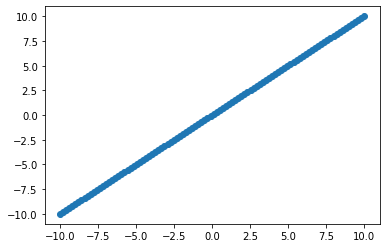

In [8]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

- 시그모이드 함수

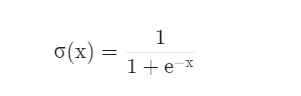

    * 출력값이 0과 1 사이로 나타남
    * 0과 1 사이에서 포화(saturate)되는 문제가 있음

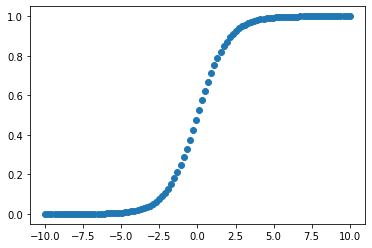

In [9]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

* 하이퍼볼릭 탄젠트(tanh, Hyperbolic tangent) 함수

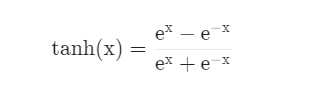  

    * 0을 중심으로 -1과 1 사이의 값이 나타남
    * 1과 1 사이에서 포화되는 문제가 있음
  

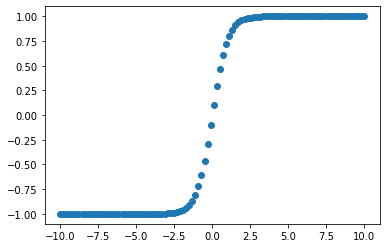

In [10]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

* ReLU(Rectified Linear Unit)

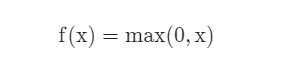

    * 0부터 무한대까지의 범위의 값을 가짐
    * 학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력이 0으로만 나온다는 문제

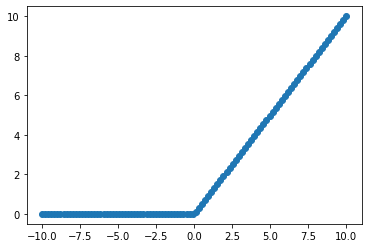

In [11]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

* Leaky ReLU 함수

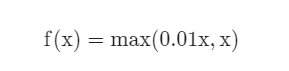  

    *  ReLU 함수의 문제인 노드 출력을 0으로만 하던 문제를 해결한 함수  
    *  노드 출력을 0이 아닌 아주 작은 음수값으로 출력하게 만들어 해결

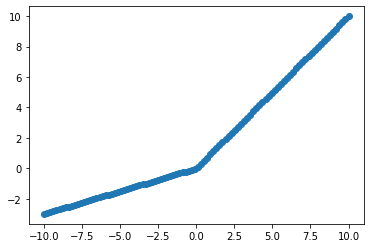

In [12]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

* ELU(Exponentail Linear Unit)함수  

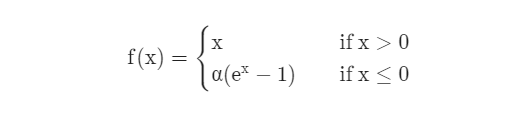  

    * ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결한 활성화 함수 
    * ELU 함수는 0 이하에서는 exponential 연산이 수행되므로 계산 비용이 높아지는 단점이 있다

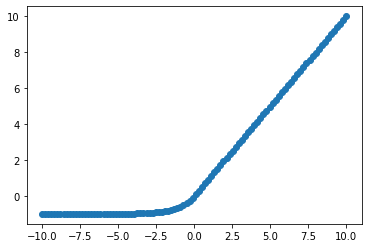

In [13]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

**Flatten layer**

In [14]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


### 딥러닝 모델

- Sequential API  
- Functional API
- Subclassing API

In [16]:
from tensorflow.keras import models, utils

#### Sequential API

- 모델이 순차적 구조로 진행될 때 사용하는 간단한 방법
- 다중 입력 및 출력이 존재하는 복잡한 모델을 구성할 수 없음


In [17]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


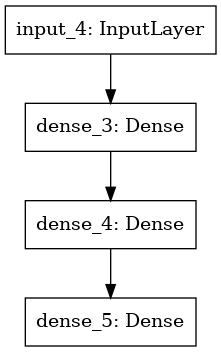

In [18]:
utils.plot_model(model) # 모델을 시각화

In [19]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


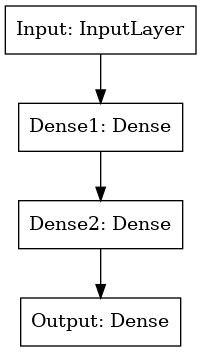

In [20]:
utils.plot_model(model) 

#### Functional API

- 가장 권장되는 방법
- 딥러닝 모델을 복잡하고 유연하게 구성하는 것이 가능
- 다중 입출력을 다룰 수 있음

In [21]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


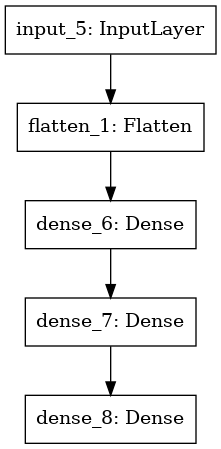

In [22]:
utils.plot_model(model)

In [23]:
# Functional API를 이용하면 Input 객체를 여러 레이어에서 사용하는 것이 가능
# Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합하였습니다.

inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 28, 100)      2900        input_6[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 28, 30)       3030        dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_6[0][0]                    
                                                                 dense_10[0][0]             

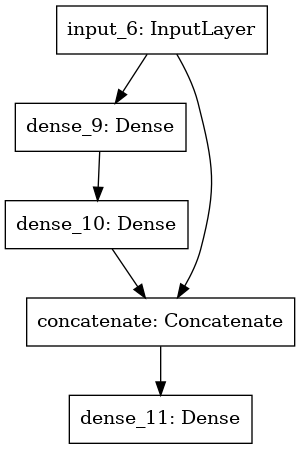

In [24]:
utils.plot_model(model)

In [25]:
# 여러 Input 객체를 사용하는 것도 가능
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10, 100)      2900        Input_2[0][0]                    
__________________________________________________________________________________________________
Input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 10)       1010        dense_12[0][0]                   
____________________________________________________________________________________________

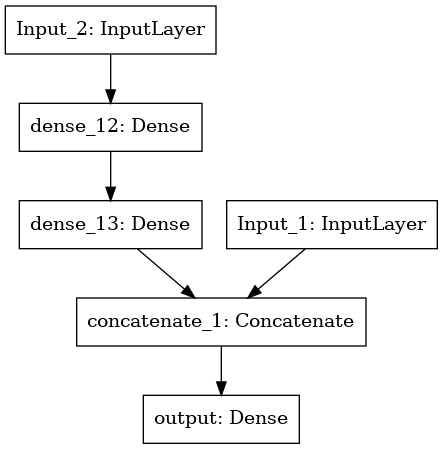

In [26]:
utils.plot_model(model)

In [27]:
# 결과를 여러개로 나눠서 사용하는 것도 가능
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10, 10)       1010        dense_14[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_15[0][0]                   
____________________________________________________________________________________________

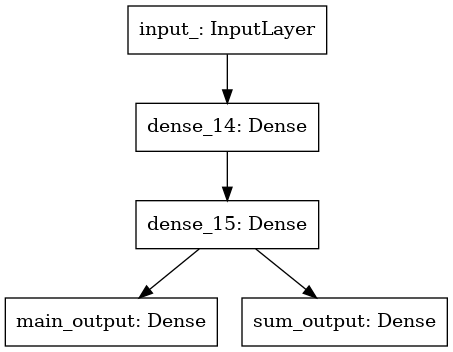

In [28]:
utils.plot_model(model)

In [29]:
# 다중 입력과 다중 출력이 가능한 모델
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 10)       1010        dense_16[0][0]                   
____________________________________________________________________________________________

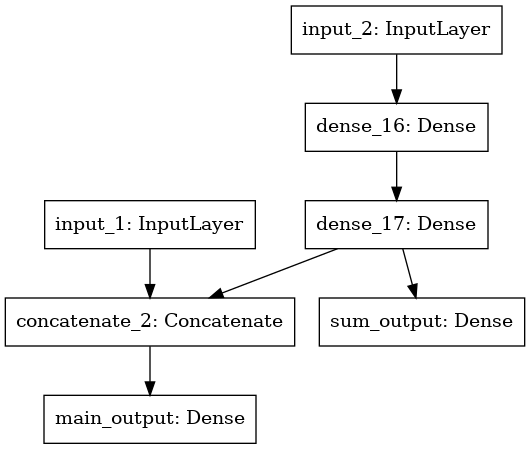

In [30]:
utils.plot_model(model)

#### Subclassing API
- 서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법
- Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용할 수 있음

    - fit(): 모델 학습
    - evaluate(): 모델 평가
    - predict(): 모델 예측
    - save(): 모델 저장
    - load(): 모델 불러오기
    - call(): 메소드안에서 원하는 계산 가능

- Subclassing API를 사용하면 Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만, 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 함.






In [44]:
# Subclassing API의 예시
class MyModel(models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense_layer1 = layers.Dense(300, activation=activation)
        self.dense_layer2 = layers.Dense(100, activation=activation)
        self.dense_layer3 = layers.Dense(units, activation=activation)
        self.output_layer = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        return x

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models

class YourModel(models.Model):
    def __init__(self, **kwargs):
        super(YourModel, self).__init__(**kwargs)
        # Flatten 레이어를 쌓으세요.
        self.flat_layer = layers.Flatten()
        # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer1 = layers.Dense(400, activation='relu')
        # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer2 = layers.Dense(200, activation='relu')
        # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
        self.output_layer = layers.Dense(100, activation='softmax')

    def call(self, inputs):
        # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
        x = self.flat_layer(inputs)
        x = self.dense_layer1(x)
        x = self.dense_layer2(x)
        x = self.output_layer(x)
        return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_28 (Dense)             multiple                  12000400  
_________________________________________________________________
dense_29 (Dense)             multiple                  80200     
_________________________________________________________________
dense_30 (Dense)             multiple                  20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## 미션

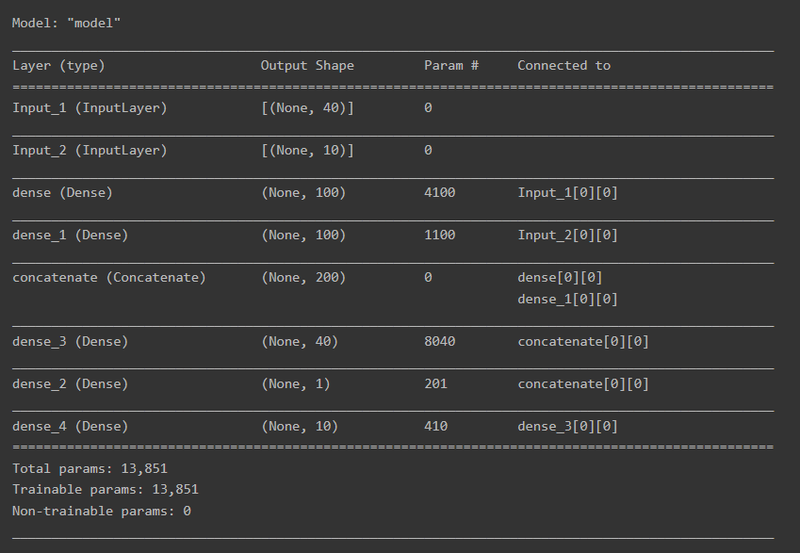
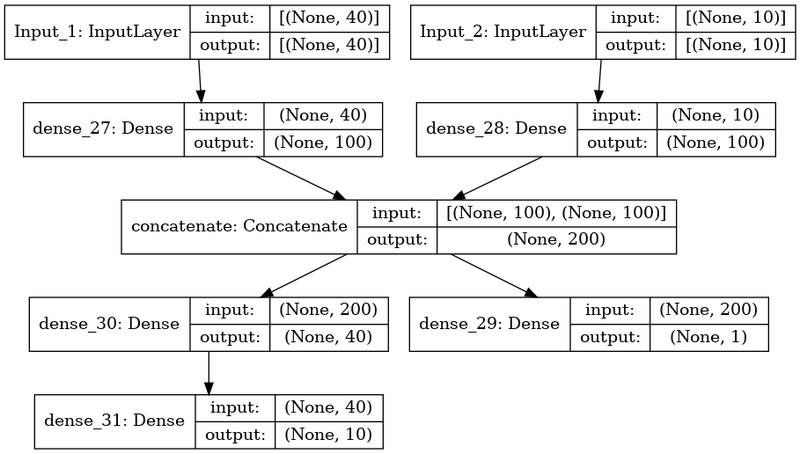

In [ ]:
# Functional API 방식 혹은 Subclassing API 방식으로 구현해주세요.
from tensorflow.keras import layers, models

# [[YOUR CODE]]
class MyModel(models.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.input_1 = layers.Input(shape=(40,40), name='input_1')
        self.input_2 = layers.Input(shape=(10,10), name='input_2')
        self.dense_layer1 = layers.Dense(100, activation = activation)
        self.dense_layer2 = layers.Dense(40, activation = activation)
        self.concat = layers.Concatenate()
        self.output_layer = layers.Dense(10, activation = 'softmax')

    def call(self, inputs):
        input1, input2 = inputs